# Machine Learning Projects
# Mercedes Safety time prediction

### Table of Contents

1. [Dataset Description](#mercedes)
2. [Importing the packages and dataset](#packages)
3. [Exploring the dataset](#explore)
4. [Checking for null values](#null)
5. [Feature Engineering](#fe)    
6. [Scaling](#s)
7. [PCA](#p)
     - 7.1 [Fitting a default model](#fp)
     - 7.2 [Finding optimum components using variance score,plot and scree plot](#op)
     - 7.3 [Fitting the PCA model to dataset](#fop)
8. [Splitting the dataset](#split)
9. [Linear Regression](#lr)
     - 9.1 [Fitting the Linear Regression model](#flr)
     - 9.2 [Evaluating the Linear Regression model](#elr)
10. [Decision Tree](#dt)
     - 10.1 [Fitting the Decision Tree Model](#fdt)
     - 10.2 [Evaluating the Decision Tree Model](#edt)
     - 10.3 [Parameter Tuning for Decision Tree](#ptdt)
     - 10.4 [Fitting the Decision Tree model after parameter tuning](#ptfdt)
     - 10.5 [Evaluating the Decision Tree after parameter tuning](#ptedt)    
11. [Random Forest](#rf)
     - 11.1 [Fitting the Random Forest Model](#frf)
     - 11.2 [Evaluating the Random Forest Model](#erf)
     - 11.3 [Parameter Tuning for Random Forest](#ptrf)
     - 11.4 [Fitting the Random Forest after parameter tuning](#ptfrf)
     - 11.5 [Evaluating the Random Forest after parameter tuning](#pterf)
12. [Support Vector Machine](#svm)
     - 12.1 [Fitting the Support Vector Machine Model](#fsvm)
     - 12.2 [Evaluating the Support Vector Machine Model](#esvm)
     - 12.3 [Parameter Tuning for Support Vector Machine](#ptsvm)
     - 12.4 [Fitting the Support Vector Machine model after parameter tuning](#ptfsvm)
     - 12.5 [Evaluating the Support Vector Machine after parameter tuning](#ptesvm)
13. [K Nearest Neighbors](#knn)
     - 13.1 [Fitting the K Nearest Neighbors Model](#fknn)
     - 13.2 [Evaluating the K Nearest Neighbors Model](#eknn)
     - 13.3 [Parameter Tuning for K Nearest Neighbors](#ptknn)
     - 13.4 [Fitting the K Nearest Neighbors model after parameter tuning](#ptfknn)
     - 13.5 [Evaluating the K Nearest Neighbors after parameter tuning](#pteknn)
14. [XG Boost Classifier](#xgb)
     - 14.1 [Fitting the XG Boost Classifier Model](#fxgb)
     - 14.2 [Evaluating theXG Boost Classifier Model](#exgb)
     - 14.3 [Parameter Tuning for XG Boost Classifier](#ptxgb)
     - 14.4 [Fitting the XG Boost Classifier model after parameter tuning](#ptfxgb)
     - 14.5 [Evaluating the XG Boost Classifier after parameter tuning](#ptexgb)
15. [Ada Boost Classifier](#ada)
     - 15.1 [Fitting the Ada Boost Classifier Model](#fada)
     - 15.2 [Evaluating the Ada Boost Classifier Model](#eada)
     - 15.3 [Parameter Tuning for Ada Boost Classifier](#ptada)
     - 15.4 [Fitting the Ada Boost Classifier model after parameter tuning](#ptfada)
     - 15.5 [Evaluating the Ada Boost Classifier after parameter tuning](#pteada)
16. [Gradient Boost Classifier](#gradient)
     - 16.1 [Fitting the Gradient Boost Classifier Model](#fgradient)
     - 16.2 [Evaluating the Gradient Boost Classifier Model](#egradient)
     - 16.3 [Parameter Tuning for Gradient Boost Classifier](#ptgradient)
     - 16.4 [Fitting the Gradient Boost Classifier model after parameter tuning](#ptfgradient)
     - 16.5 [Evaluating the Gradient Boost Classifier after parameter tuning](#ptegradient)
17. [Bagging Classifier](#bag)
     - 17.1 [Fitting the Bagging Classifier Model](#fbag)
     - 17.2 [Evaluating the Bagging Classifier Model](#ebag)
     - 17.3 [Parameter Tuning for Bagging Classifier](#ptbag)
     - 17.4 [Fitting the Bagging Classifier model after parameter tuning](#ptfbag)
     - 17.5 [Evaluating the Bagging Classifier after parameter tuning](#ptebag)
18. [Comparison table of all metrics](#ct)
8. [Appendix](#appendix)

## Mercedes-Benz Greener

### 1. Dataset Description  <a id='mercedes'>
**Objective**
The objective is to predict the y column which is the time taken for testing for each car.
    
**Descriptions**
This dataset contains an anonymized set of variables (X0 to X385), each representing a custom feature in a Mercedes car.

** Note: This is confidential data and we will not be able to provide description for each of the anonymized set of variables.

For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.


### 2. Importing the packages and dataset  <a id='packages'>

In [178]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
# Reading the dataset
mercedes = pd.read_csv('mercedes.csv')

### 3. Exploring the dataset  <a id='explore'>

In [180]:
# Getting the head of the dataset
mercedes.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [181]:
# Shape of the dataset
mercedes.shape

(4209, 378)

**PCA is to be performed for finding out the most optimum features**

# Descriptive Statistics

In [182]:
# Summary statistics of mercedes
mercedes.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**We need to scale before going for the PCA analysis**

### 4. Checking for null values  <a id='null'>

In [183]:
# Checking for null values
mercedes.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

**We could see there are no null values present**

### 5. Feature Engineering  <a id='fe'>

In [184]:
# Before applying PCA to label the data so to import Label Encoder and encode all the values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encoding all the categorical columns
mercedes['X0'] = le.fit_transform(mercedes['X0'])
mercedes['X1'] = le.fit_transform(mercedes['X1'])
mercedes['X2'] = le.fit_transform(mercedes['X2'])
mercedes['X3'] = le.fit_transform(mercedes['X3'])
mercedes['X4'] = le.fit_transform(mercedes['X4'])
mercedes['X5'] = le.fit_transform(mercedes['X5'])
mercedes['X6'] = le.fit_transform(mercedes['X6'])
mercedes['X8'] = le.fit_transform(mercedes['X8'])

In [186]:
mercedes.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [187]:
mercedes = mercedes.drop('ID',1)

### 6. Scaling <a id='s'>

In [188]:
# Assigning x and y values
x = mercedes.drop('y',1)
y = mercedes['y']

In [189]:
x.shape

(4209, 376)

In [190]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(x)

In [191]:
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)

### 7. PCA <a id='p'>

### 7.1 Fitting a default PCA <a id='fp'>

In [192]:
# Importing PCA and fitting it to the dataset
from sklearn.decomposition import PCA
pca = PCA(376)
pca.fit(x_scaled)

PCA(copy=True, iterated_power='auto', n_components=376, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### 7.2 Finding optimum components using variance score,plot and scree plot <a id='op'>

In [193]:
# Getting variance score for 200
pca.explained_variance_ratio_[:200].sum()

0.9916975486878112

**Variance plot**

Text(200,0.9,'200')

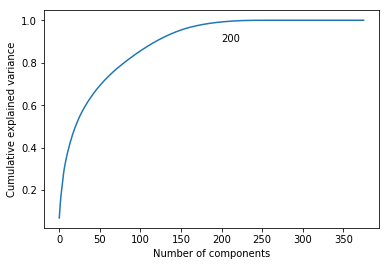

In [194]:
# Variance plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('200',xy=(200, .90))

**Scree plot**

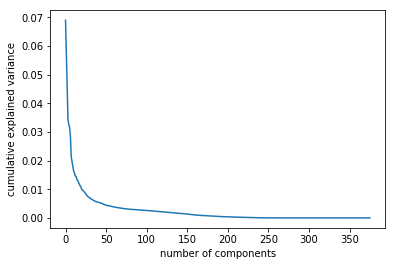

In [195]:
# Scree plot to find the features with min variance
from matplotlib import pyplot as plt

#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**As its become stable at  250 so we can take  250 components from the dataset**

### 7.3 Fitting the PCA model to dataset <a id='fop'>

In [196]:
# Applying PCA to the dataset
pca = PCA(n_components=200)
X_scaled = pca.fit_transform(x_scaled)

### 8. Splitting the dataset <a id='split'>

In [197]:
# Importing train test split and splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=2)

### 9. Linear Regression <a id='lr'>

### 9.1 Fitting the Linear Regression model <a id = 'flr'>

In [198]:
# Importing the LinearRegression and training and testing the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lin_pred = lr.predict(x_test)

### 9.2 Evaluating the Linear Regression model <a id = 'elr'>

In [199]:
# Importing the metrics
from sklearn import metrics

In [200]:
# RMSE score for Linear Regression
lr_rmse = np.sqrt(metrics.mean_squared_error(lin_pred,y_test))
lr_rmse

46.46149399671013

### 10.  Decision Tree  <a id = 'dt'>

### 10.1  Fitting the Decision Tree model  <a id = 'fdt'>

In [101]:
# Importing Decision Tree and fitting the model
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

### 10.2 Evaluating the Decision Tree model <a id = 'edt'>

In [66]:
# RMSE for Decision Tree
dt_rmse = np.sqrt(metrics.mean_squared_error(dt_pred,y_test))
dt_rmse

13.081013004360317

### 10.3 Parameter Tuning <a id = 'ptdt'>

In [103]:
# Importing  Randomizedsearchcv and finding out optimal parameters for Decision Tree
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth': np.arange(1,20),'criterion':['mse']}
dr = DecisionTreeRegressor()
tree = RandomizedSearchCV(dr, params, cv=3 , return_train_score = True) # RandomizedSearchCV
tree.fit(x_scaled,y)# Fit

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_di

In [104]:
# Optimal parameters
tree.best_params_

{'max_depth': 5, 'criterion': 'mse'}

### 10.4 Fitting the Decision Tree model after parameter Tuning <a id = 'ptfdt'>

In [107]:
# Fitting the model and training and testing after parameter tuning
dtr = DecisionTreeRegressor(criterion='mse',max_depth=5)
dtr.fit(x_train,y_train)
pred1 = dtr.predict(x_test)

### 10.5 Evaluating the Decision Tree model after parameter Tuning <a id = 'ptfdt'>

In [108]:
dt_tune_rmse = np.sqrt(metrics.mean_squared_error(pred1,y_test))
dt_tune_rmse

10.4104160040942

### 11. Random Forest <a id = 'rf'>

### 11.1 Fitting the Random Forest model <a id = 'frf'>

In [110]:
# Importing Random Forest Classifier and fitting the model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 11.2 Evaluating the Random Forest model <a id = 'erf'>

In [111]:
rf_rmse = np.sqrt(metrics.mean_squared_error(rf_pred,y_test))
rf_rmse

9.511756629243507

### 11.3 Parameter Tuning <a id = 'ptrf'>

In [112]:
#  Finding optimal parameters for Random Forest using Randomized Search CV
rf = RandomForestRegressor()
params1 = {'n_estimators': np.arange(1,20),'criterion':['mse']}
forest = RandomizedSearchCV(rf, params, cv=3 , return_train_score = True) # GridSearchCV
forest.fit(x_scaled,y)# Fit

C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [113]:
# Optimal parameters
forest.best_params_

{'max_depth': 4, 'criterion': 'mse'}

### 11.4 Fitting the Random Forest model after parameter Tuning <a id = 'ptfrf'>

In [115]:
# Random Forest after parameter tuning
rfr = RandomForestRegressor(criterion='mse',max_depth=4)
rfr.fit(x_train,y_train)
pred2 = rfr.predict(x_test)

C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 11.5 Evaluating the Random Forest model after parameter Tuning <a id = 'pterf'>

In [117]:
rf_tune_rmse = np.sqrt(metrics.mean_squared_error(pred2,y_test))
rf_tune_rmse

10.016400263917298

### 12. Support Vector Machine <a id = 'svm'>

###  12.1 Fitting the Support Vector Machine model  <a id = 'fsvm'>

In [119]:
# Importing Support Vector
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)

C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 12.2 Evaluating the Support Vector model <a id = 'esvm'>

In [120]:
svr_rmse = np.sqrt(metrics.mean_squared_error(svr_pred,y_test))
svr_rmse

9.764399256364

### 12.3  Parameter Tuning <a id = 'ptsvm'>

In [122]:
# Using Randomized Search cv to find the optimal parameters for SVM
params2 = {'kernel':['linear','rbf'],'C': [0.01, 0.1,1],'gamma': [0.01,0.1,1]}
svr = SVR()
support = RandomizedSearchCV(svr, params2, cv=5 , return_train_score = True) # RandomizedSearchCV
support.fit(x_scaled,y)# Fit

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [123]:
# Optimal parameters
support.best_params_

{'kernel': 'linear', 'gamma': 1, 'C': 0.01}

### 12.4 Fitting the Support Vector Machine model after parameter Tuning <a id = 'ptfsvm'>

In [124]:
# Fitting the model and training and testing
svrr = SVR(C = 1,gamma = 0.01,kernel = 'linear')
svrr.fit(x_train,y_train)
pred3 = svrr.predict(x_test)

### 12.5 Evaluating the Support Vector Machine model after parameter Tuning <a id = 'ptesvm'>

In [125]:
svr_tune_rmse = np.sqrt(metrics.mean_squared_error(pred3,y_test))
svr_tune_rmse

9.31979764991908

### 13. K Nearest Neighbors <a id = 'knn'>

### 13.1 Fitting the K Nearest Neighbors model <a id = 'fknn'>

In [127]:
# Importing KNearest Neighbors and fitting the model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

### 13.2 Evaluating the K Nearest Neighbors model <a id = 'eknn'>

In [128]:
knn_rmse = np.sqrt(metrics.mean_squared_error(knn_pred,y_test))
knn_rmse

9.69966252122418

### 13.3 Parameter Tuning <a id = 'ptknn'>

In [129]:
# Finding optimal parameters
from sklearn.neighbors import KNeighborsRegressor
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
params4 = {'leaf_size':np.arange(1,50),'n_neighbors':np.arange(1,30),'p':[1,2]}
knn = KNeighborsRegressor()
neighbor = RandomizedSearchCV(knn, params4, cv=3 , return_train_score = True) # RandomizedSearchCV
neighbor.fit(x_scaled,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2]},
    

In [130]:
# Optimal parameters
neighbor.best_params_

{'p': 1, 'n_neighbors': 15, 'leaf_size': 20}

### 13.4 Fitting the Support Vector Machine model after parameter Tuning <a id = 'ptfknn'>

In [131]:
# Fitting the model and training and testing after parameter tuning
knnr = KNeighborsRegressor(n_neighbors=15,p=1,leaf_size=20)
knnr.fit(x_train,y_train)
pred4 = knnr.predict(x_test)

### 13.5 Evaluating the Support Vector Machine model after parameter Tuning <a id = 'pteknn'>

In [132]:
# RMSE score for KNN after parameter tuning
knn_tune_rmse = np.sqrt(metrics.mean_squared_error(pred4,y_test))
knn_tune_rmse

9.776853352981329

### 14. XG Boost Classifier <a id = 'xgb'>

In [137]:
# Importing XGB Regressor and fitting the model
from xgboost.sklearn import XGBRegressor

xgb_model = XGBRegressor(max_depth=3,learning_rate=0.1,n_estimators=100)

### 14.1 Fitting the XG Boost Classifier model <a id = 'fxgb'>

In [139]:
# Training and testing the model
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

[14:37:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### 14.2 Evaluating the XG Boost Classifier <a id = 'exgb'>

In [140]:
# RMSE for XGB model
xgb_rmse = np.sqrt(metrics.mean_squared_error(xgb_pred,y_test))
xgb_rmse

8.811011662886562

### 14.3 Parameter Tuning <a id = 'ptxgb'>

In [144]:
# Finding optimal parameters using Randomized Search CV
param_grid1 = {"max_depth": [10,15,20,30],
              "n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05]}
 

XGB = RandomizedSearchCV(xgb_model,param_distributions=param_grid1,
                           cv = 5)
XGB.fit(x_scaled,y)

[14:40:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:41:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sudha\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[14:41:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                  

In [145]:
# Optimal parameters
XGB.best_params_

{'n_estimators': 19, 'max_depth': 10, 'learning_rate': 0.05}

### 14.4 Fitting the XG Boost Classifier model after parameter Tuning <a id = 'ptfxgb'>

In [ ]:
# Fitting the model after parameter tuning
xgbr = XGBRegressor(n_estimators=19,max_depth=10,learning_rate=0.05)
xgbr.fit(x_train,y_train)
xgbr_pred = xgbr.predict(x_test)

### 14.5 Evaluating the XG Boost Classifier model after parameter Tuning <a id = 'ptexgb'>

In [147]:
# RMSE score for XGB after parameter tuning
xgb_tune_rmse = np.sqrt(metrics.mean_squared_error(xgbr_pred,y_test))
xgb_tune_rmse

38.98335536130937

### 15. Ada Boost Classifier <a id = 'ab'>

### 15.1 Fitting the Ada Boost Classifier model  <a id = 'fada'>

In [148]:
# Importing Adaboost and fitting the model
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
ab_pred = ab.predict(x_test)

### 15.2 Evaluating the Ada Boost Classifier model <a id = 'eada'>

In [150]:
# RMSE score for Adaboost
ab_rmse = np.sqrt(metrics.mean_squared_error(ab_pred,y_test))
ab_rmse

12.83717181598334

### 15.3 Parameter Tuning <a id = 'ptada'>

In [152]:
# Finding optimal parameters using Randomized Search CV
param_grid1 = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1]}
 

AB = RandomizedSearchCV(ab,param_distributions=param_grid1,
                           cv = 5)
AB.fit(x_scaled,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1],
                                        'n_estimators': range(5, 20, 2)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [153]:
# Optimal parameters
AB.best_params_

{'n_estimators': 11, 'learning_rate': 0.1}

### 15.4 Fitting the XG Boost Classifier model after parameter Tuning <a id = 'ptfada'>

In [154]:
# Fitting the model after parameter tuning
abr = AdaBoostRegressor(n_estimators=11,learning_rate=0.1)
abr.fit(x_train,y_train)
abr_pred = abr.predict(x_test)

### 15.5 Evaluating the XG Boost Classifier model after parameter Tuning <a id = 'pteada'>

In [155]:
# RMSE score for Adaboost after parameter tuning
ab_tune_rmse = np.sqrt(metrics.mean_squared_error(abr_pred,y_test))
ab_tune_rmse

10.458488861260326

### 16. Gradient Boosting Classifier <a id = 'gradient'>

### 16.1 Fitting the Gradient Boost Classifier model <a id = 'fgradient'>

In [156]:
# Importing GradientBoosting and fitting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)

### 16.2 Evaluating the Gradient Boost Classifier model <a id = 'egradient'>

In [157]:
# RMSE score for Gradient Boosting
gb_rmse = np.sqrt(metrics.mean_squared_error(gb_pred,y_test))
gb_rmse

8.909953522606019

### 16.3  Parameter Tuning <a id = 'ptgradient'>

In [158]:
# Finding optimal parameters using Randomized Search CV
param_grid1 = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1]}
 

GB = RandomizedSearchCV(gb,param_distributions=param_grid1,
                           cv = 5)
GB.fit(x_scaled,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [159]:
# Optimal parameters
GB.best_params_

{'n_estimators': 9, 'learning_rate': 0.5}

### 16.4 Fitting the Gradient Boosting Classifier model after parameter Tuning <a id = 'ptfgradient'>

In [160]:
# Fitting the model after parameter tuning
gbr = GradientBoostingRegressor(n_estimators=9,learning_rate=0.5)
gbr.fit(x_train,y_train)
gbr_pred = gbr.predict(x_test)

### 16.5 Evaluating the Gradient Boosting Classifier model after parameter Tuning <a id = 'ptegradient'>

In [161]:
# RMSE score for Gradient Boosting after parameter tuning
gb_tune_rmse = np.sqrt(metrics.mean_squared_error(gbr_pred,y_test))
gb_tune_rmse

9.520711980315454

### 17. Bagging Classifier <a id = 'bag'>

### 17.1 Fitting the Bagging Classifier model <a id = 'fbag'>

In [163]:
# Importing Bagging Regressor and fitting the model
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
br.fit(x_train,y_train)
br_pred = br.predict(x_test)

### 17.2 Evaluating the Bagging Classifier model <a id = 'ebag'>

In [164]:
# RMSE score for Bagging Regressor
br_rmse = np.sqrt(metrics.mean_squared_error(br_pred,y_test))
br_rmse

9.55534085948009

### 17.3 Parameter Tuning <a id = 'ptbag'>

In [165]:
# Finding optimal parameters for Bagging Regressor
param_grid1 = {"n_estimators": range(5,20,2) ,  
              "max_samples": [0.05, 0.1, 0.2, 0.5]}
 

BR = RandomizedSearchCV(br,param_distributions=param_grid1,
                           cv = 5)
BR.fit(x_scaled,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=BaggingRegressor(base_estimator=None,
                                              bootstrap=True,
                                              bootstrap_features=False,
                                              max_features=1.0, max_samples=1.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'max_samples': [0.05, 0.1, 0.2, 0.5],
                                        'n_estimators': range(5, 20, 2)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [166]:
# Optimal parameters
BR.best_params_

{'n_estimators': 15, 'max_samples': 0.1}

### 17.4 Fitting the Bagging Classifier model after parameter Tuning <a id = 'ptfbag'>

In [167]:
# Fitting the model after parameter tuning
brr = BaggingRegressor(n_estimators=15,max_samples=0.1)
brr.fit(x_train,y_train)
brr_pred = brr.predict(x_test)

### 18. Comparison table of all metrics <a id = 'ct'>

In [168]:
# RMSE score for Bagging Regressor after parameter tuning
br_tune_rmse = np.sqrt(metrics.mean_squared_error(brr_pred,y_test))
br_tune_rmse

9.970088196207008

In [ ]:
### 17.5 Evaluating the Bagging Classifier model after parameter Tuning <a id = 'ptebag'>

In [207]:
metrics = {'Metrics': ['Before Parameter Tune RMSE','After Parameter Tune RMSE'],'Linear Regression':[lr_rmse,'NA'],
           'Decision Tree Regressor':[dt_rmse,dt_tune_rmse],'Ramdom Forest Regressor':[rf_rmse,rf_tune_rmse],'Support Vector Regressor':[svr_rmse,svr_tune_rmse],
          'KNearestNeighbor Regressor':[knn_rmse,knn_tune_rmse],
          'XG Boost Regressor':[xgb_rmse,xgb_tune_rmse],
          'Ada Boost Regressor':[ab_rmse,ab_tune_rmse],
          'Gradient Boosting Regressor':[gb_rmse,gb_tune_rmse],
          'Bagging Regressor':[br_rmse,br_tune_rmse]}

In [209]:
metrics = pd.DataFrame(metrics)

In [210]:
metrics

,Metrics,Linear Regression,Decision Tree Regressor,Ramdom Forest Regressor,Support Vector Regressor,KNearestNeighbor Regressor,XG Boost Regressor,Ada Boost Regressor,Gradient Boosting Regressor,Bagging Regressor
0,Before Parameter Tune RMSE,46.4615,13.081013,9.511757,9.764399,9.699663,8.811012,12.837172,8.909954,9.555341
1,After Parameter Tune RMSE,NA,10.410416,10.016400,9.319798,9.776853,38.983355,10.458489,9.520712,9.970088


### 19. Appendix <a id = 'appendix'>

From the dataframe we can see that Gradient Boosting is the best model followed by KNN and Bagging